In [1]:
%matplotlib inline

#### Necessary Libraries

In [2]:
import math
import timeit
import numpy as np
import matplotlib.pyplot as plt
from random import *
import datetime
from math import sqrt,exp

#### Payoff using Monte Carlo simulation


$$
\begin{eqnarray}
S_T &=& S_t  \exp^ {(r - 0.5 \sigma^2)(T-t) + \sigma \sqrt{T - t_\epsilon} }
\end{eqnarray}
$$

- $r$ is our risk free interest rate to discount by.
- $σ$ is volatility, the annualised standard deviation of a stock’s returns.
- $(T-t)$ gives us the annualised time to maturity. E.g. for a 30 day option this would be
30/365=0.082...30/365=0.082
- $S$ at time t . The price of the underlying asset.
- $e$ is our random value. Its distribution must be standard normal (mean of 0.0 and standard
deviation of 1.0)

#### Algorithm for Monte Carlo

1 being a standard normally distributed random
variable, write
$$
\begin{eqnarray}
S_T &=& S_t  \exp^ {(r - 0.5 \sigma^2)(T-t) + \sigma \sqrt{T - t_\epsilon} }
\end{eqnarray}
$$
for i = 1, ..., I do
Draw a standard normally distributed pseudo-random number zT,i 

2 Simulate the index level value ST,i given equation (A.1) and zT,i 
3 Determine the inner value of the call at T as max[S 4 T,i − K, 0]
5 Sum up all inner values at T, take the average and discount back to t = 0 to arrive at the
Monte Carlo estimator for the option value:
C0(K, T) ≈ e−rT ⋅ 1
I
∑
I
max[ST (i) − K, 0]

- Consider the date of maturity T and, for zT 1 being a standard normally distributed random variable, write

$$
\begin{eqnarray}
S_T &=& S_0  \exp^ {(r - 0.5 \sigma^2)T + \sigma \sqrt{T} z_T}
\end{eqnarray}
$$

- for r i = 1, ..., I do
    - Draw a standard normally distributed pseudo-random number $z_T,_i$
    - Simulate the index level value $S_T,_i$ given equation above and $z_T,_i$
    - Determine the inner value of the call at T as  max $[S_T,_i − K, 0]$
- Sum up all inner values at T, take the average and discount back to t = 0 to arrive at the Monte Carlo estimator for the option value:

$$
\begin{eqnarray}
C_0 ( K,T ) &=& \exp^ {(rT)} + \sigma \sqrt{T} z_T}
\end{eqnarray}
$$

    

In [343]:
def plotPayoff(s,r,t,sigma,k,mu=0):
    y = (r-0.5*sigma**2)*t + sigma*sqrt(t)*(np.random.randn(1,1000))
    st =s*np.exp(y)
    plt.plot(st,np.maximum(st-k,0),'g^')
    plt.show()
    discountFactor = math.exp(-r*t)
    price = discountFactor*(np.sum(np.maximum(st-k,0))/1000)
    return price
    

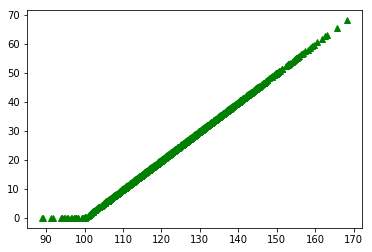

the price using monte carlo simulation is  24.8299069666


In [344]:
s= 125
r= 0
sigma = 0.114
t = 1
k= 100
price = plotPayoff(s,r,t,sigma,k)
print("the price using monte carlo simulation is ",price)

### Black Sholes

In [345]:
from scipy.stats import norm
from math import *

In [346]:
#Black and Scholes
def calcd1(St, K, r, sigma, T):
    return (np.log(St/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))

In [347]:
def blackSholes(flag,St,K,r,sigma,T):
    d1 = calcd1(St,K,r,sigma, T)
    d2 = d1-sigma*sqrt(T)
    if flag=='c':
        return St*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
    else:
        return K*exp(-r*T)*norm.cdf(-d2)-St*norm.cdf(-d1)

In [348]:
St = 125
K = 100
r = 0
sigma = 0.114
T = 1
d1 = calcd1(St,K,r,sigma, T)
d2 = d1 - sigma*sqrt(T)
print("The Price of the option using Black Sholes %f", blackSholes("c",St,K,r,sigma,T))

The Price of the option using Black Sholes %f 25.1210601982


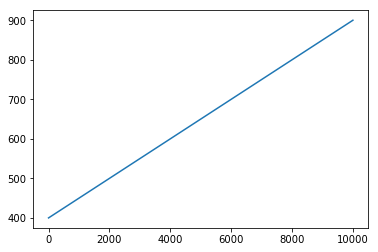

In [349]:
S = np.linspace(500,1000,10000)
price=[]
for i in S:
    price.append(blackSholes("c",i,K,r,sigma,T))
plt.plot(price)

### Heston Model - Closed form Solutions

In [350]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy
from math import sqrt, exp, log, pi
import cmath
import timeit

In [351]:
S = 125 #intial spot price
K = 100 #strike price
v = 0.114 #spot variance
y = 0.0 #dividend
sigma = 1 # Variance of the voltality process
rho = 0.36 # Correlation coefficient between the two brownian motion
k = 2.58 #strength of mean reversion
theta = 0.043 #Long term volatality 
r = 0 #risk free rate
tau = 1 #time in years
x = np.log(S)
u1 = 0.5
u2 = -0.5

In [352]:
b1 = k  - rho*sigma
b2 = k 

a = k*theta

In [353]:
def get_d(rho,sigma,phi,b1,b2,u1,u2):
    
    d1 = cmath.sqrt( (1j*rho*sigma*phi - b1)**2 - sigma**2*(1j*2*u1*phi - phi**2) )
    d2 = cmath.sqrt( (1j*rho*sigma*phi - b2)**2 - sigma**2*(1j*2*u2*phi - phi**2) )
 
    return([d1,d2])

In [354]:
def get_f(r, phi, tau, a, sigma,b1,b2,rho,d1,d2,g1,g2,C1,C2,D1,D2,v,x):
    f1 = cmath.exp(C1 + D1*v + 1j*phi*x)
    f2 = cmath.exp(C2 + D2*v + 1j*phi*x)
    return([f1,f2])

In [355]:

def get_g(rho,sigma,phi,b1,b2,u1,u2,d1,d2):

    g1 = (b1 - 1j*rho*sigma*phi + d1)/(b1 - 1j*rho*sigma*phi - d1)
    g2 = (b2 - 1j*rho*sigma*phi + d2)/(b2 - 1j*rho*sigma*phi - d2)
    
    return([g1,g2])

In [356]:
def get_D(rho,sigma,phi,b1,b2,u1,u2,d1,d2,g1,g2):

    D1 = (b1 - 1j*rho*sigma*phi + d1)/sigma**2*((1 - cmath.exp(d1*tau))/(1 - g1*cmath.exp(d1*tau)))
    D2 = (b2 - 1j*rho*sigma*phi + d2)/sigma**2*((1 - cmath.exp(d2*tau))/(1 - g2*cmath.exp(d2*tau)))
    
    return([D1,D2])

In [357]:
def get_C(r, phi, tau, a, sigma,b1,b2,rho,d1,d2,g1,g2):
    C1 = r*phi*1j*tau + a/phi**2 * ( (b1 - 1j*rho*sigma*phi + d1)*tau - 2 * cmath.log((1 - g1*cmath.exp(d1*tau))/(1-g1)))
    C2 = r*phi*1j*tau + a/phi**2 * ( (b2 - 1j*rho*sigma*phi + d2)*tau - 2 * cmath.log((1 - g2*cmath.exp(d2*tau))/(1-g2)))
    return([C1,C2])

In [358]:
#first integrand
def integral1(phi):
    [d1,d2] = get_d(rho,sigma,phi,b1,b2,u1,u2)
    [g1,g2] = get_g(rho,sigma,phi,b1,b2,u1,u2,d1,d2)
    [D1,D2] = get_D(rho,sigma,phi,b1,b2,u1,u2,d1,d2,g1,g2)
    [C1,C2] = get_C(r, phi, tau, a, sigma,b1,b2,rho,d1,d2,g1,g2)
    [f1,f2] = get_f(r, phi, tau, a, sigma,b1,b2,rho,d1,d2,g1,g2,C1,C2,D1,D2,v,x)
    val = cmath.exp(-1j*phi*log(K))*f1/(1j*phi)
    return(val.real)

In [359]:
#second integrand
def integral2(phi):
    [d1,d2] = get_d(rho,sigma,phi,b1,b2,u1,u2)
    [g1,g2] = get_g(rho,sigma,phi,b1,b2,u1,u2,d1,d2)
    [D1,D2] = get_D(rho,sigma,phi,b1,b2,u1,u2,d1,d2,g1,g2)
    [C1,C2] = get_C(r, phi, tau, a, sigma,b1,b2,rho,d1,d2,g1,g2)
    [f1,f2] = get_f(r, phi, tau, a, sigma,b1,b2,rho,d1,d2,g1,g2,C1,C2,D1,D2,v,x)
    val = cmath.exp(-1j*phi*log(K))*f2/(1j*phi)
    return(val.real)

In [360]:
#get price of call option using Heston model
def get_price():
    P1 = 1/2 + 1/pi * quad(integral1, 0, 384)[0]
    P2 = 1/2 + 1/pi * quad(integral2, 0, 384)[0]
    C = S*P1 - exp(-(r-y)*tau)*K*P2
    return(C)

In [361]:
get_price()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


25.21021382857225

In [166]:
import time
start_time = time.time()
get_price()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.02554464340209961 seconds ---


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


### Valuing European Option Using the Heston Model - Quantlib

Heston model can be used to value options by modeling the underlying asset such as the stock of a company. The one major feature of the Heston model is that it inocrporates a stochastic volatility term.

$$
\begin{eqnarray}
dS_t &=& \mu S_tdt + \sqrt{V_t} S_t dW_t^1 \\
dV_t &=& \kappa(\theta-V_t) + \sigma \sqrt{V_t} dW_t^2
\end{eqnarray}
$$

Here :

- $S_t$ is the asset's value at time $t$
- $\mu$ is the expected growth rate of the log normal stock value
- $V_t$ is the variance of the asset $S_t$
- $W_t^1$ is the stochastic process governing the $S_t$ process
- $\theta$ is the value of mean reversion for the variance $V_t$
- $\kappa$ is the strengh of mean reversion
- $\sigma$ is the volatility of volatility
- $W_t^2$ is the stochastic process governing the $V_t$ process
- The correlation between $W_t^1$ and $W_t^2$ is $\rho$

In contrast, the Black-Scholes-Merton process assumes that the volatility is constant.

In [203]:
from QuantLib import *
import matplotlib.pyplot as plt
import numpy as np
#from scipy.integrate import simps, cumtrapz, romb
% matplotlib inline
import math

Let us consider a European call option for AAPL with a strike price of \$100 maturing on 01th Jan, 2017. Let the spot price be \125. The volatility of the underlying stock is know to be 20 , and has a dividend yield of 0%. We assume a short term risk free rate of 0.1%. Lets value this option as of 31th Dec,2017 . 

In [276]:
# option parameters
strike_price = 100
payoff = PlainVanillaPayoff(Option.Call, strike_price)

# option data
maturity_date = Date(1,1,2018)
spot_price = 125
volatility = 0.114 # the historical vols for a year
dividend_rate =  0
option_type = Option.Call

risk_free_rate = 0
day_count = Actual365Fixed()
calendar = UnitedStates()

calculation_date = Date(1,1,2017)
Settings.instance().evaluationDate = calculation_date

In [277]:
# construct the European Option
payoff = PlainVanillaPayoff(option_type, strike_price)
exercise = EuropeanExercise(maturity_date)
european_option = VanillaOption(payoff, exercise)

In [278]:
# construct the Heston process

v0 = volatility*volatility  # spot variance
kappa = 2.58
theta = 0.043
sigma = 1
rho = 0.36

spot_handle = QuoteHandle(
    SimpleQuote(spot_price)
)
flat_ts = YieldTermStructureHandle(
    FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = YieldTermStructureHandle(
    FlatForward(calculation_date, dividend_rate, day_count)
)
heston_process = HestonProcess(flat_ts, dividend_yield,
                               spot_handle, v0, kappa,
                               theta, sigma, rho)

In [279]:
engine = AnalyticHestonEngine(HestonModel(heston_process),0.01, 1000)
european_option.setPricingEngine(engine)
h_price = european_option.NPV()
print ("The Heston model price is",h_price)

The Heston model price is 25.720881664926736


### Valuing European Option using Black Sholes - Quantlib

In [280]:
flat_vol_ts = BlackVolTermStructureHandle(
    BlackConstantVol(calculation_date, calendar, 
                     volatility, day_count)
)
bsm_process = BlackScholesMertonProcess(spot_handle, dividend_yield, 
                                        flat_ts, flat_vol_ts)
european_option.setPricingEngine(AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print("The Black-Scholes-Merton model price is ", bs_price)

The Black-Scholes-Merton model price is  25.121060198191387


### Correlated GBM - Generator

In [483]:
def corGBM(n,row,t=1/365,plot=True):
    x = np.random.randn(1,n)
    se = math.sqrt(1-row**2)
    e = np.random.randn(1,n)*se
    y = row*x + e
    
    X = np.cumsum(x*sqrt(t))
    Y = np.cumsum(y*sqrt(t))
        
    if plot:
        plt.plot(X,"red")
        plt.plot(Y,"blue")
    
    #return(np.corrcoef(X,Y)[1,1])
    

In [ ]:
corGBM(1000,0.36)

In [34]:
import random

In [55]:
N=1000
T =1 
dt = T/N

v =[] 
v.append(0.114)
s =[]
s.append(125)
for i in range(1,N):
    x=random.gauss(0,1)
    firstTerm = 2.58*(0.043 - max(0,v[i-1]))*(dt)
    secondTerm = (max(0,v[i-1]) *dt)**0.5
    randomTerm = 0.36*x+math.sqrt(1-0.36**2)*x
    v.append(max(0,v[i-1]) + firstTerm + secondTerm * randomTerm)
    s.append(s[i-1] + math.sqrt(max(v[i-1],0)*dt)*s[i-1]*x)

v1 =[] 
v1.append(0.114)
s1 =[]
s1.append(125)
for i in range(1,N):
    x=random.gauss(0,1)
    firstTerm = 2.58*(0.043 - abs(v1[i-1]))*(dt)
    secondTerm = (abs(v1[i-1]) *dt)**0.5
    randomTerm = 0.36*x+math.sqrt(1-0.36**2)*x
    v1.append(abs(v1[i-1]) + firstTerm + secondTerm * randomTerm)
    s1.append(s1[i-1] + math.sqrt(max(v1[i-1],0)*dt)*s1[i-1]*x)

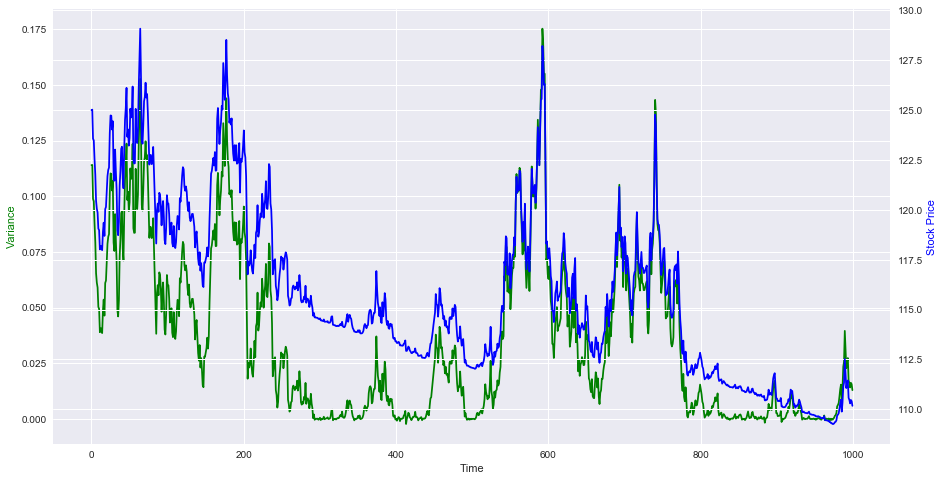

In [56]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,8)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(v, 'g-')
ax2.plot(s, 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Variance', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

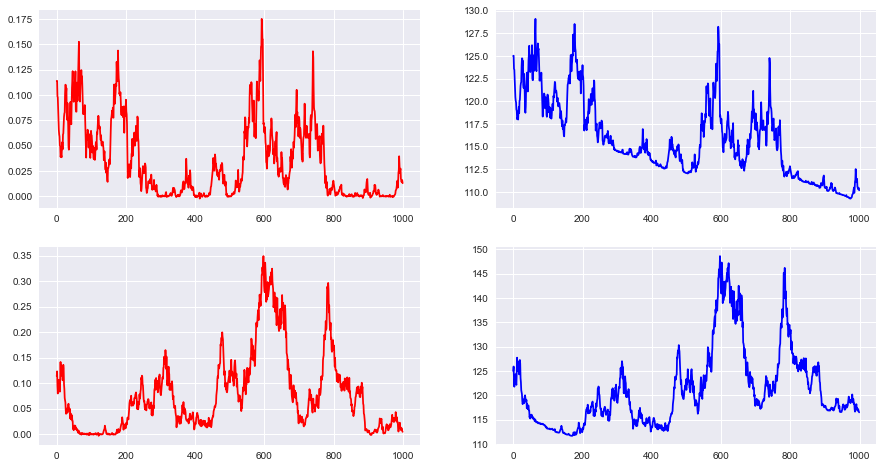

In [57]:
plt.figure(1)
plt.subplot(221)
plt.plot(v, 'red')

plt.subplot(222)
plt.plot(s,'blue')

plt.subplot(223)
plt.plot(v1,'red')

plt.subplot(224)
plt.plot(s1,'blue')

plt.show()

### Heston with Euler discritisation

In [420]:
r = 0
N= 2000
K = 100
T =1 
dt = T/N
M=2000
row =0.36
kappa = 2.58
eta = 0.043
v0 = 0.114
s0 = 125
sigma = 1

c=[]

for j in range(1,M):
    v =[]
    v.append(v0)
    s =[]
    s.append(s0)
    for i in range(1,N):
        x=random.gauss(0,1)
        firstTerm = kappa*(eta - max(0,v[i-1]))*(dt)
        secondTerm = sigma*(max(0,v[i-1]) *dt)**0.5
        randomTerm = row*x+math.sqrt(1-row**2)*x
        v.append(max(0,v[i-1]) + firstTerm + secondTerm * randomTerm)
        s.append(s[i-1] + math.sqrt(max(v[i-1],0)*dt)*s[i-1]*x + r*s[i-1]*dt)
        
    c.append(math.exp(-r*T)*max(s[N-1]-K,0))
        
        
price = np.mean(c)
error = np.std(c)/math.sqrt(M)

(price,error)

(25.928930091967604, 1.5260998815780378)

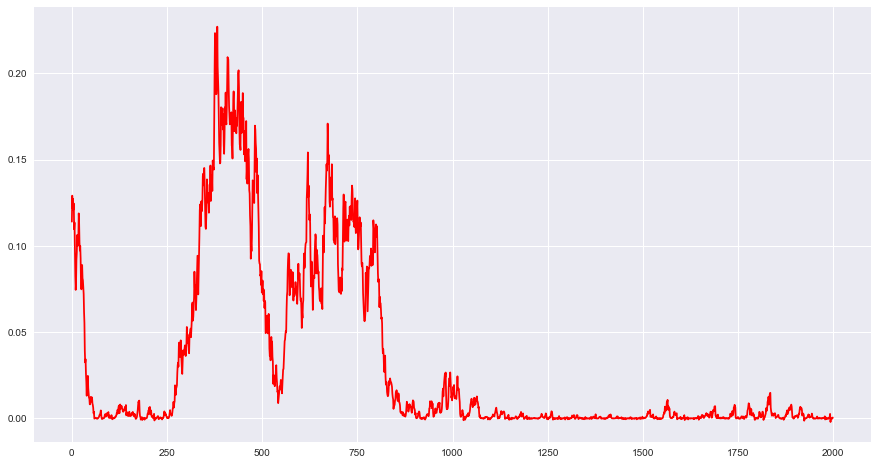

In [422]:
plt.plot(v,'red')

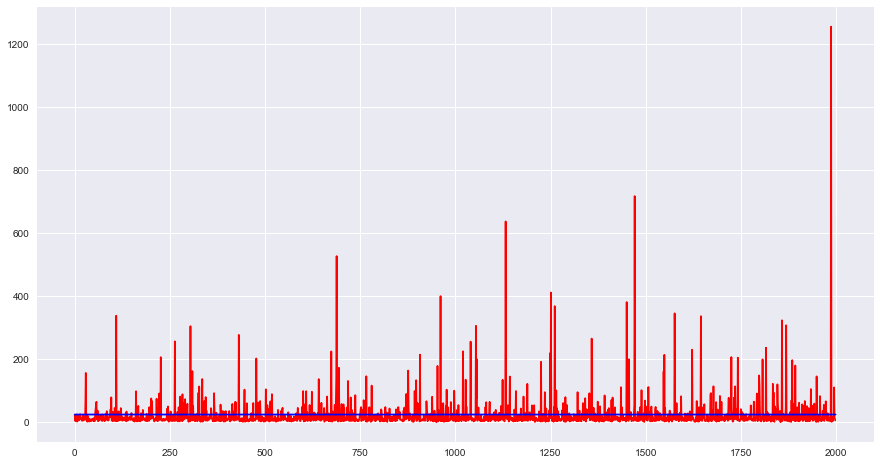

In [392]:
plt.plot(c,'red',[price]*M,'blue')
plt.show()

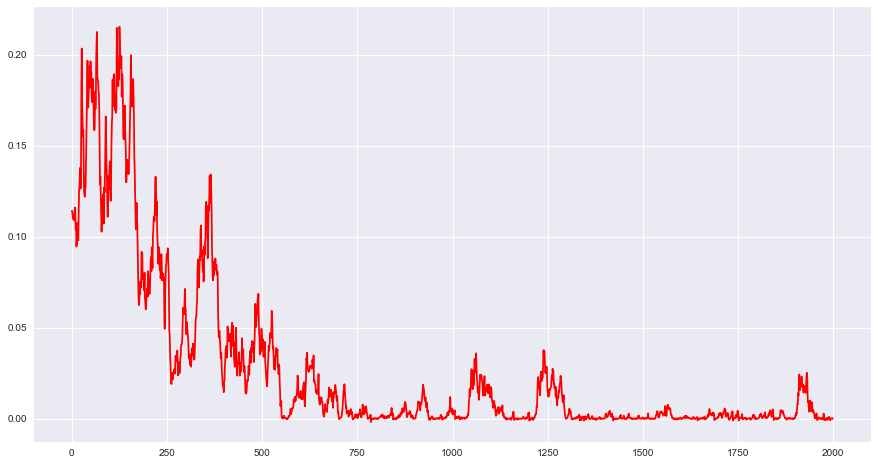

In [393]:
plt.plot(v,'red')

### Heston with euler discritisation - 10 Prices

In [462]:
r = 0
N= 1000
K = 100
T =1 
dt = T/N
M=500
row =0.36
kappa = 2.58
eta = 0.043
v0 = 0.114
s0 = 125
sigma = 1

c=[]
O = 10
price = []
error=[]

for ii in range (0,O):
    
    for j in range(1,M):
        v =[]
        v.append(v0)
        s =[]
        s.append(s0)
        for i in range(1,N):
            x=random.gauss(0,1)
            firstTerm = kappa*(eta - max(0,v[i-1]))*(dt)
            secondTerm = sigma*(max(0,v[i-1]) *dt)**0.5
            randomTerm = row*x+math.sqrt(1-row**2)*x
            v.append(max(0,v[i-1]) + firstTerm + secondTerm * randomTerm)
            s.append(s[i-1] + math.sqrt(max(v[i-1],0)*dt)*s[i-1]*x + r*s[i-1]*dt)
        
        c.append(math.exp(-r*T)*max(s[N-1]-K,0))
    
    price.append(np.mean(c))
    error.append(np.std(c)/math.sqrt(M))

In [463]:
np.mean(price),np.std(price)/math.sqrt(O)

(22.952986267938861, 0.17097199958905157)

In [464]:
list(zip(price, error))

[(21.984591671842558, 1.6918345689654344),
 (22.302572093137904, 1.5800474139168137),
 (22.140331476207312, 1.6008411138376615),
 (23.204495135749532, 1.8420316777948338),
 (23.354400213525761, 1.8058338416088702),
 (23.313034525028229, 1.795770072308196),
 (23.32564431125931, 1.7568051528921376),
 (23.372913511787598, 1.7403062632097956),
 (23.130310733502583, 1.7332133553953104),
 (23.401569007347842, 1.7962617490196147)]